In [2]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf

In [3]:
#load the saved model 
json_file = open('NN_108-56-5.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights("NN_108-56-5_weights.h5")

In [4]:
#load test data
path = 'x:/Steering/Recordings/Processed/'
testX = np.load(path + 'TestX_NN_108-56-5.npy')
testY = np.load(path + 'TestY_NN_108-56-5.npy')
one_hot_test = np.load(path + 'OneHot_testY_108-56-5.npy')

In [5]:
testY

array([2, 2, 5, ..., 4, 3, 5], dtype=int64)

In [6]:
loaded_model.compile(loss='mean_squared_error',
    optimizer='Adam',
           metrics=['categorical_accuracy'])

In [7]:
loaded_model.evaluate(testX,one_hot_test,verbose=1)

194117/194117 [==============================] - 2s 8us/step


[0.053336052134293536, 0.8198612177195176]

In [7]:
#process weights
weights_first_layer = loaded_model.layers[0].get_weights()[0]
biases_first_layer = loaded_model.layers[0].get_weights()[1]

weights_second_layer = loaded_model.layers[1].get_weights()[0]
biases_second_layer = loaded_model.layers[1].get_weights()[1]


In [8]:
weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


In [9]:
weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


In [10]:
weights_first_layer_norm.shape, weights_second_layer_norm.shape

((109, 56), (57, 5))

In [11]:
abs(weights_first_layer).max(), abs(weights_second_layer).max()

(115.9948, 22.477001)

In [12]:
np.savetxt('weights_first_layer_norm_NN_108-56-5.txt',weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_108-56-5.txt',weights_second_layer_norm,delimiter= ',')


In [8]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,loaded_model.predict_classes(testX)) 

In [9]:
cfm

array([[    0,     0,     0,     0,     0,     0],
       [18047,   364,     2,  1734,   747,     0],
       [  308, 53345,     5,  1777,   327,     0],
       [    7,    39, 23223,    43,    82,     0],
       [ 1956, 12009,     6, 35379,  5707,     0],
       [  851,  1393,    79,  7532, 29155,     0]], dtype=int64)

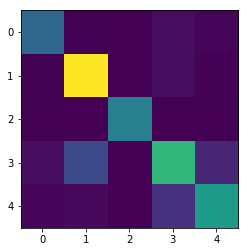

In [10]:
plt.imshow(cfm[1:,:-1])

In [11]:
a = [0 for x in range(5)]
cfm_norm = np.zeros((5,5))#[[0 for x in range(5)] for y in range(5)]

In [14]:
for idx in range(5):
    cfm_norm[idx,:] = cfm[idx+1,:-1] / sum(cfm[idx+1,:-1]) #len(testY[testY == idx + 1])      

In [15]:
cfm_norm, a

(array([[8.63740787e-01, 1.74212693e-02, 9.57212597e-05, 8.29903322e-02,
         3.57518905e-02],
        [5.52347477e-03, 9.56655070e-01, 8.96667982e-05, 3.18675801e-02,
         5.86420860e-03],
        [2.99222023e-04, 1.66709413e-03, 9.92690433e-01, 1.83807814e-03,
         3.50517227e-03],
        [3.55268177e-02, 2.18119404e-01, 1.08977968e-04, 6.42588590e-01,
         1.03656211e-01],
        [2.18149193e-02, 3.57087926e-02, 2.02512176e-03, 1.93078698e-01,
         7.47372469e-01]]), [0, 0, 0, 0, 0])

In [16]:
cfm_norm = np.around(cfm_norm,decimals=3)

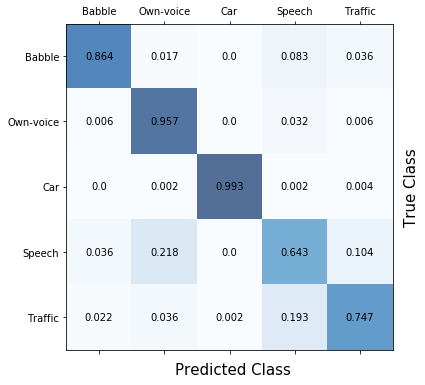

In [17]:
#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.set_yticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=15)
ax.set_ylabel('True Class',fontsize=15)
plt.show()


In [23]:
fig.savefig('Conf_Matrix_ERB=2.png',dpi=100)

In [22]:
sum(cfm_norm[4,:])

1.0